In [1]:
import pandas

In [16]:
usd_rates = pandas.read_excel("usd_rates.xlsx")

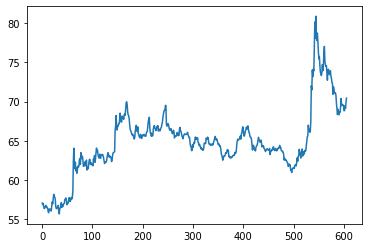

In [6]:
usd_rates.curs.plot()

In [7]:
future = 7 # prediction about next 7 days

In [8]:
past = 28 # period of time used for prediction

In [9]:
money = usd_rates.curs

In [10]:
money[72:100]

72    61.6644
73    61.7494
74    62.6027
75    62.7260
76    61.9997
77    63.4860
78    63.2012
79    62.7148
80    63.0066
81    62.5229
82    61.7354
83    61.7684
84    61.9164
85    62.3033
86    61.8215
87    61.9408
88    62.5327
89    61.2610
90    61.5945
91    61.4090
92    61.6659
93    62.2710
94    62.6420
95    62.5937
96    62.0188
97    62.2056
98    61.9290
99    61.9822
Name: curs, dtype: float64

In [11]:
money[100:107]

100    62.0064
101    61.8125
102    62.6680
103    62.3431
104    63.1164
105    62.2511
106    62.6851
Name: curs, dtype: float64

In [12]:
money.shape

(606,)

In [17]:
start = past
end =len(money) - future
count = end - start
print(f"{start} ... {end}, ={count}")

28 ... 599, =571


In [19]:
training_past = []
training_future = []
for day in range(start, end):
    past_data = money[(day - past):day]
    future_data = money[day:(day + future)]
    training_past.append(list(past_data))
    training_future.append(list(future_data))

In [21]:
future_columns = []
for i in range(future):
    future_columns.append(f"future_{i}")

In [22]:
future_columns

['future_0',
 'future_1',
 'future_2',
 'future_3',
 'future_4',
 'future_5',
 'future_6']

In [23]:
past_columns = []
for i in range(past):
    past_columns.append(f"past_{i}")

In [24]:
past_columns

['past_0',
 'past_1',
 'past_2',
 'past_3',
 'past_4',
 'past_5',
 'past_6',
 'past_7',
 'past_8',
 'past_9',
 'past_10',
 'past_11',
 'past_12',
 'past_13',
 'past_14',
 'past_15',
 'past_16',
 'past_17',
 'past_18',
 'past_19',
 'past_20',
 'past_21',
 'past_22',
 'past_23',
 'past_24',
 'past_25',
 'past_26',
 'past_27']

In [28]:
past_df = pandas.DataFrame(training_past, columns = past_columns)

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_18,past_19,past_20,past_21,past_22,past_23,past_24,past_25,past_26,past_27
0,57.0463,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,...,56.0408,56.6278,57.2196,56.9533,57.6736,58.1718,58.0171,57.7701,57.5899,56.5918
1,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,...,56.6278,57.2196,56.9533,57.6736,58.1718,58.0171,57.7701,57.5899,56.5918,56.3554
2,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,...,57.2196,56.9533,57.6736,58.1718,58.0171,57.7701,57.5899,56.5918,56.3554,56.3438
3,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,...,56.9533,57.6736,58.1718,58.0171,57.7701,57.5899,56.5918,56.3554,56.3438,56.5201
4,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,...,57.6736,58.1718,58.0171,57.7701,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,73.6894,72.7263,73.9719,74.1169,73.8725,73.4326,73.5819,73.9298,73.2056,72.9798,...,70.7520,69.7114,68.9831,68.3413,69.0151,68.6319,68.3123,68.6745,68.6183,69.1219
567,72.7263,73.9719,74.1169,73.8725,73.4326,73.5819,73.9298,73.2056,72.9798,72.3918,...,69.7114,68.9831,68.3413,69.0151,68.6319,68.3123,68.6745,68.6183,69.1219,70.3950
568,73.9719,74.1169,73.8725,73.4326,73.5819,73.9298,73.2056,72.9798,72.3918,72.3381,...,68.9831,68.3413,69.0151,68.6319,68.3123,68.6745,68.6183,69.1219,70.3950,69.7524
569,74.1169,73.8725,73.4326,73.5819,73.9298,73.2056,72.9798,72.3918,72.3381,70.9240,...,68.3413,69.0151,68.6319,68.3123,68.6745,68.6183,69.1219,70.3950,69.7524,69.4822


In [31]:
future_df = pandas.DataFrame(training_future, columns = future_columns)

In [32]:
future_df

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717
1,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742
2,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334
3,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616
4,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000
...,...,...,...,...,...,...,...
566,70.3950,69.7524,69.4822,69.6180,69.5725,69.4835,68.8376
567,69.7524,69.4822,69.6180,69.5725,69.4835,68.8376,68.8376
568,69.4822,69.6180,69.5725,69.4835,68.8376,68.8376,69.4660
569,69.6180,69.5725,69.4835,68.8376,68.8376,69.4660,69.1284


In [34]:
#training set
X_train = past_df[:-10]
Y_train = future_df[:-10]

In [35]:
#test set
X_test = past_df[-10:]
Y_test = future_df[-10:]

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
forest = RandomForestRegressor(n_estimators = 1000)

In [100]:
forest.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [101]:
forest.predict(X_test.head(1))

array([[68.9390561, 68.7011541, 68.4262421, 68.4658452, 68.4409317,
        68.5828872, 69.1819012]])

In [102]:
Y_test.head(1)

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
561,68.6319,68.3123,68.6745,68.6183,69.1219,70.395,69.7524


In [103]:
from sklearn.metrics import mean_absolute_error

In [104]:
prediction = forest.predict(X_test.head(1))[0]

In [105]:
real = Y_test.iloc[0]

In [106]:
mean_absolute_error(real, prediction)

0.5943289714286502

In [107]:
import matplotlib.pyplot as plt

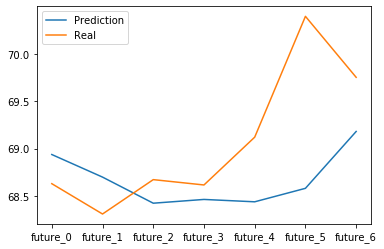

In [108]:
plt.plot(prediction, label = 'Prediction')
plt.plot(real, label = 'Real')
plt.legend()
plt.show()

In [109]:
prediction = forest.predict([X_test.iloc[1]])[0]
real = Y_test.iloc[1]

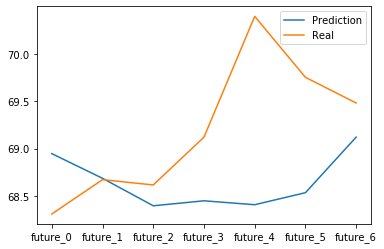

In [110]:
plt.plot(prediction, label = 'Prediction')
plt.plot(real, label = 'Real')
plt.legend()
plt.show()

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

In [128]:
linReg = LinearRegression(normalize = True)
linReg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Day 1 (LinReg)
Mae = 0.8363974173424741


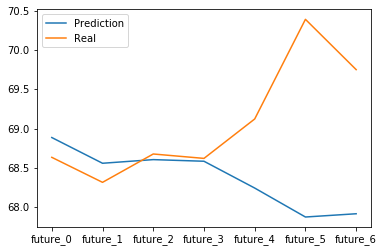

In [126]:
print("Day 1 (LinReg)")
prediction = linReg.predict([X_test.iloc[0]])[0]
real = Y_test.iloc[0]
mae = mean_absolute_error(prediction, real)
print(f"Mae = {mae}")
plt.plot(prediction, label = 'Prediction')
plt.plot(real, label = 'Real')
plt.legend()
plt.show()

In [132]:
from sklearn.neural_network import MLPRegressor

In [159]:
mlp = MLPRegressor(max_iter = 2000, hidden_layer_sizes=(100,100))

In [160]:
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Day 1 (MLP)
Mae = 0.7811064543320408


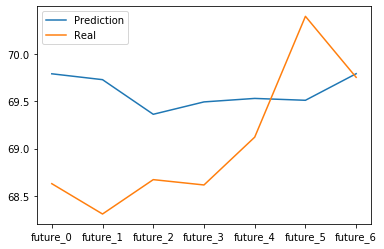

In [161]:
print("Day 1 (MLP)")
prediction = mlp.predict([X_test.iloc[0]])[0]
real = Y_test.iloc[0]
mae = mean_absolute_error(prediction, real)
print(f"Mae = {mae}")
plt.plot(prediction, label = 'Prediction')
plt.plot(real, label = 'Real')
plt.legend()
plt.show()

In [162]:
import pickle

In [170]:
pickle.dump(mlp, open("mlp.model", "wb"))

In [171]:
#cross validation:

In [172]:
from sklearn.model_selection import GridSearchCV

In [174]:
from sklearn.neighbors import KNeighborsRegressor

In [175]:
KNN = KNeighborsRegressor(p=2)

In [177]:
param_grid = {
    "n_neighbors": [1,2,4,8],
    "weights": ['uniform', 'distance']
}
gs = GridSearchCV(KNN, param_grid, "neg_mean_absolute_error", cv=4)

In [178]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 4, 8],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [180]:
gs.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

In [181]:
gs.best_score_

-2.160651243102294

In [183]:
best_model = gs.best_estimator_

In [184]:
best_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

Day 1 (MLP)
Mae = 0.7811064543320408


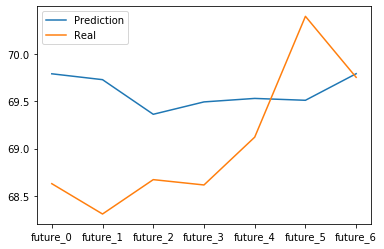

In [185]:
print("Day 1 (MLP)")
prediction = mlp.predict([X_test.iloc[0]])[0]
real = Y_test.iloc[0]
mae = mean_absolute_error(prediction, real)
print(f"Mae = {mae}")
plt.plot(prediction, label = 'Prediction')
plt.plot(real, label = 'Real')
plt.legend()
plt.show()